In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/Admission_Predict.csv")

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.drop(["Serial No."],axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
x=df.iloc[:,:-1].values 
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [ ]:
y=df.iloc[:,-1].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
x.shape

(400, 7)

In [ ]:

y.shape

(400,)

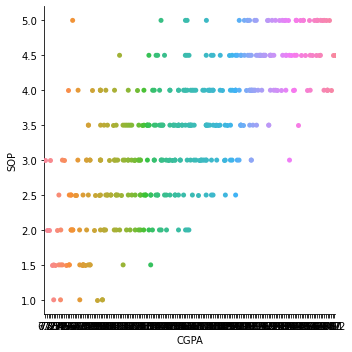

In [ ]:
sns.catplot(x="CGPA",y="SOP",data=df)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
y_train=(y_train>0.5)

In [ ]:
y_test=(y_test>0.5)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
reg1=DecisionTreeClassifier(random_state=0)

In [ ]:
reg=LogisticRegression(random_state=0,max_iter=1000)

In [ ]:
pred=reg.fit(X_train,y_train)

In [ ]:
pred1=reg1.fit(X_train,y_train)

In [ ]:
y_pred=pred.predict(X_test)

In [ ]:
y_predtree=pred1.predict(X_test)


In [ ]:
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False])

In [ ]:
y_predtree

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("Accuracy Score (logistic regression):%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score(logistic regression):%f"%(recall_score(y_test,y_pred)*100))
print("roc (logistic regression):%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))

Accuracy Score (logistic regression):96.250000
Recall score(logistic regression):100.000000
roc (logistic regression):70.000000
[[ 2  3]
 [ 0 75]]


In [ ]:
print("Accuracy Score (decision tree):%f"%(accuracy_score(y_test,y_predtree)*100))
print("Recall score (decision tree):%f"%(recall_score(y_test,y_predtree)*100))
print("roc (decision tree):%f"%(roc_auc_score(y_test,y_predtree)*100))
print(confusion_matrix(y_test,y_predtree))

Accuracy Score (decision tree):88.750000
Recall score (decision tree):93.333333
roc (decision tree):56.666667
[[ 1  4]
 [ 5 70]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
pred2=rfc.fit(X_train,y_train)
y_predrfc=pred2.predict(X_test)
y_predrfc

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
print("Accuracy Score (Random forest):%f"%(accuracy_score(y_test,y_predrfc)*100))
print("Recall score (Random forest):%f"%(recall_score(y_test,y_predrfc)*100))
print("roc (Random forest):%f"%(roc_auc_score(y_test,y_predrfc)*100))
print(confusion_matrix(y_test,y_predrfc))

Accuracy Score (Random forest):93.750000
Recall score (Random forest):98.666667
roc (Random forest):59.333333
[[ 1  4]
 [ 1 74]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
reg3= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
pred3=reg3.fit(X_train, y_train)  

In [ ]:
y_predknn=pred3.predict(X_test)

In [ ]:
y_predknn

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
print("Accuracy Score (k nearest neighbour):%f"%(accuracy_score(y_test,y_predknn)*100))
print("Recall score (k nearest neighbour)):%f"%(recall_score(y_test,y_predknn)*100))
print("roc (k nearest neighbour):%f"%(roc_auc_score(y_test,y_predknn)*100))
print(confusion_matrix(y_test,y_predknn))

Accuracy Score (k nearest neighbour):93.750000
Recall score (k nearest neighbour)):98.666667
roc (k nearest neighbour):59.333333
[[ 1  4]
 [ 1 74]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(kernel_initializer='uniform', activation='relu', input_dim=7,units=7))
classifier.add(Dropout(rate=0.1))

In [ ]:
classifier.add(Dense(kernel_initializer='uniform', activation='relu', input_dim=7,units=7))
classifier.add(Dropout(rate=0.1))

In [ ]:
classifier.add(Dense(kernel_initializer='uniform', activation='relu', input_dim=7,units=7))
classifier.add(Dropout(rate=0.1))

In [ ]:
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dropout_7 (Dropout)         (None, 7)                 0         
                                                                 
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dropout_8 (Dropout)         (None, 7)                 0         
                                                                 
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dropout_9 (Dropout)         (None, 7)                 0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
history=classifier.fit(X_train, y_train, batch_size=32,epochs=50)

Epoch 1/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.8844
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.9062
Epoch 3/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.9062
Epoch 4/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.9062
Epoch 5/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.9062
Epoch 6/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.9062
Epoch 7/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.9062
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.9062
Epoch 9/50
10/10 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.9062
Epoch 10/50
10/10 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.9062
Epoch 11/50
10/10 [

In [ ]:
y_pred4=classifier.predict(X_test)
y_pred4

array([[0.8009363 ],
       [0.9945833 ],
       [0.7489401 ],
       [0.7100495 ],
       [0.69062316],
       [0.86744714],
       [0.9999909 ],
       [0.99996555],
       [0.99970025],
       [0.8924048 ],
       [0.9908534 ],
       [0.9996259 ],
       [0.96114194],
       [0.79389155],
       [0.9999502 ],
       [0.99990296],
       [0.6875147 ],
       [0.990193  ],
       [0.99915135],
       [0.99432874],
       [0.9999246 ],
       [0.9968846 ],
       [0.9960041 ],
       [0.968326  ],
       [0.9830961 ],
       [0.9600712 ],
       [0.796432  ],
       [0.9999659 ],
       [0.8466703 ],
       [0.95843416],
       [0.99818873],
       [0.975524  ],
       [0.9798165 ],
       [0.9822825 ],
       [0.80945027],
       [0.99964476],
       [0.70658135],
       [0.8649637 ],
       [0.97952974],
       [0.9974607 ],
       [0.99995846],
       [0.9983574 ],
       [0.987613  ],
       [0.8157184 ],
       [0.8635317 ],
       [0.9752418 ],
       [0.93819547],
       [0.871

In [ ]:
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14065389335155487
Test accuracy: 0.9375


In [ ]:
import pickle
pickle.dump(pred2,open('university.pkl','wb'))
model=pickle.load(open('university.pkl','rb'))